In [ ]:
#import necessary libraries

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima -q
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse


In [ ]:
#mount google drive
from google.colab import drive
drive.mount ('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crops = pd.read_excel('/content/drive/MyDrive/Applied Data Science for Social Impact/faostat_crops_new.xlsx')

In [ ]:
crops.head(10)

,Total Production,Year,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,NaN,NaN,62,'230,Ethiopia and Eritrea,656.0,'01610,"Coffee, green",5312.0,Area harvested,...,528571.000000,538466.000000,561762.000000,653910.000000,700475.000000,725961.00000,764863.00000,758523.000000,856592.000000,685294.00000
1,NaN,NaN,62,'230,Ethiopia and Eritrea,656.0,'01610,"Coffee, green",5510.0,Production,...,275530.000000,392006.000000,419980.000000,457014.230000,469091.000000,449229.81000,494574.36000,482560.570000,584789.570000,456000.00000
2,NaN,NaN,62,'230,Ethiopia and Eritrea,656.0,'01610,"Coffee, green",5419.0,Yield,...,5213.000000,7280.000000,7476.000000,6989.000000,6697.000000,6188.00000,6466.00000,6362.000000,6827.000000,6654.00000
3,NaN,NaN,62,'230,Ethiopia and Eritrea,656.0,'01610,"Coffee, green",NaN,Total Production,...,303734.975314,432109.100303,462940.736576,503775.179785,517102.557978,495184.84246,545158.89194,531944.307948,644625.771518,502647.43795
4,NaN,NaN,62,'230,Ethiopia and Eritrea,331.0,'2168,Oil crop,5510.0,Production,...,3800.000000,4400.000000,6200.000000,7600.000000,6500.000000,5500.00000,7000.00000,7700.000000,8900.000000,NaN
5,NaN,NaN,62,'230,Ethiopia and Eritrea,334.0,'21691.12,Oil crop,5510.0,Production,...,3800.000000,4400.000000,6200.000000,7600.000000,6500.000000,5500.00000,7000.00000,7700.000000,8900.000000,0.00000
6,NaN,NaN,62,'230,Ethiopia and Eritrea,290.0,'21691.07,Oil crop,5510.0,Production,...,672.000000,624.000000,659.000000,614.000000,633.000000,636.00000,628.00000,630.000000,630.000000,NaN
7,NaN,NaN,62,'230,Ethiopia and Eritrea,1841.0,'F1841,Oil crop,5312.0,Area harvested,...,4472.000000,5024.000000,6859.000000,8214.000000,7133.000000,6136.00000,7628.00000,8330.000000,9530.000000,0.00000
8,NaN,NaN,62,'230,Ethiopia and Eritrea,1841.0,'F1841,Oil crop,5510.0,Production,...,5144.000000,5648.000000,7518.000000,8828.000000,7766.000000,6772.00000,8256.00000,8960.000000,10160.000000,0.00000
9,NaN,NaN,62,'230,Ethiopia and Eritrea,1841.0,'F1841,Oil crop,5419.0,Yield,...,9616.000000,10672.000000,14377.000000,17042.000000,14899.000000,12908.00000,15884.00000,17290.000000,19690.000000,0.00000


In [ ]:
#drop all colums before 1999 since Kenya joine UPOV in 1999
crops.drop(columns=['Y1961','Y1962','Y1963','Y1964','Y1965','Y1966','Y1967','Y1968','Y1969','Y1970','Y1971','Y1972','Y1973','Y1974','Y1975','Y1976','Y1977','Y1978','Y1979','Y1980','Y1981','Y1982','Y1983','Y1984','Y1985','Y1986','Y1987','Y1988','Y1989','Y1990','Y1991','Y1992','Y1993','Y1994','Y1995','Y1996','Y1997','Y1998'], inplace=True)


In [ ]:
crops.head()

,Total Production,Year,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,NaN,NaN,62,'230,Ethiopia and Eritrea,656.0,'01610,"Coffee, green",5312.0,Area harvested,...,528571.000000,538466.000000,561762.000000,653910.000000,700475.000000,725961.00000,764863.00000,758523.000000,856592.000000,685294.00000
1,NaN,NaN,62,'230,Ethiopia and Eritrea,656.0,'01610,"Coffee, green",5510.0,Production,...,275530.000000,392006.000000,419980.000000,457014.230000,469091.000000,449229.81000,494574.36000,482560.570000,584789.570000,456000.00000
2,NaN,NaN,62,'230,Ethiopia and Eritrea,656.0,'01610,"Coffee, green",5419.0,Yield,...,5213.000000,7280.000000,7476.000000,6989.000000,6697.000000,6188.00000,6466.00000,6362.000000,6827.000000,6654.00000
3,NaN,NaN,62,'230,Ethiopia and Eritrea,656.0,'01610,"Coffee, green",NaN,Total Production,...,303734.975314,432109.100303,462940.736576,503775.179785,517102.557978,495184.84246,545158.89194,531944.307948,644625.771518,502647.43795
4,NaN,NaN,62,'230,Ethiopia and Eritrea,331.0,'2168,Oil crop,5510.0,Production,...,3800.000000,4400.000000,6200.000000,7600.000000,6500.000000,5500.00000,7000.00000,7700.000000,8900.000000,NaN


In [ ]:
#filter dataframe by 'Soya beans'
crops = crops[crops['Item'] == 'Soya beans']

crops.head()


,Total Production,Year,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
18,NaN,NaN,62,'230,Ethiopia and Eritrea,236.0,'0141,Soya beans,5312.0,Area harvested,...,31855.000000,30517.000000,35260.000000,38166.000000,36636.000000,38073.000000,64720.000000,54543.000000,83797.000000,66000.000000
19,NaN,NaN,62,'230,Ethiopia and Eritrea,236.0,'0141,Soya beans,5510.0,Production,...,63653.000000,61025.000000,72184.000000,89553.770000,81235.000000,86467.870000,149454.610000,125623.200000,208676.390000,156000.000000
20,NaN,NaN,62,'230,Ethiopia and Eritrea,236.0,'0141,Soya beans,5419.0,Yield,...,19982.000000,19997.000000,20472.000000,23464.000000,22174.000000,22711.000000,23092.000000,23032.000000,24903.000000,23636.000000
21,NaN,NaN,62,'230,Ethiopia and Eritrea,236.0,'0141,Soya beans,NaN,Total Production,...,70164.964747,67268.296782,79569.444868,98714.839383,89547.989739,95314.089464,164741.799189,138475.971501,230029.686046,171957.714456
51,NaN,NaN,114,'404,Kenya,236.0,'0141,Soya beans,5312.0,Area harvested,...,1911.000000,2045.000000,2225.000000,2761.000000,2215.000000,2405.000000,2390.000000,2398.000000,2398.000000,2373.000000


In [ ]:
#drop columns 'Total Production' and 'Year'
crops.drop(columns=['Total Production', 'Year'], inplace=True)
crops.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1999,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
18,62,'230,Ethiopia and Eritrea,236.0,'0141,Soya beans,5312.0,Area harvested,ha,4237.000000,...,31855.000000,30517.000000,35260.000000,38166.000000,36636.000000,38073.000000,64720.000000,54543.000000,83797.000000,66000.000000
19,62,'230,Ethiopia and Eritrea,236.0,'0141,Soya beans,5510.0,Production,t,3832.640000,...,63653.000000,61025.000000,72184.000000,89553.770000,81235.000000,86467.870000,149454.610000,125623.200000,208676.390000,156000.000000
20,62,'230,Ethiopia and Eritrea,236.0,'0141,Soya beans,5419.0,Yield,100 g/ha,9046.000000,...,19982.000000,19997.000000,20472.000000,23464.000000,22174.000000,22711.000000,23092.000000,23032.000000,24903.000000,23636.000000
21,62,'230,Ethiopia and Eritrea,236.0,'0141,Soya beans,NaN,Total Production,Tons,4224.922965,...,70164.964747,67268.296782,79569.444868,98714.839383,89547.989739,95314.089464,164741.799189,138475.971501,230029.686046,171957.714456
51,114,'404,Kenya,236.0,'0141,Soya beans,5312.0,Area harvested,ha,2529.000000,...,1911.000000,2045.000000,2225.000000,2761.000000,2215.000000,2405.000000,2390.000000,2398.000000,2398.000000,2373.000000


In [ ]:
#filter rows in 'Element' column and only keep 'Total Production' value
crops = crops[~crops['Element'].isin(['Area harvested', 'Production', 'Yield'])]
crops.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1999,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
21,62,'230,Ethiopia and Eritrea,236.0,'0141,Soya beans,NaN,Total Production,Tons,4224.922965,...,70164.964747,67268.296782,79569.444868,98714.839383,89547.989739,95314.089464,164741.799189,138475.971501,230029.686046,171957.714456
54,114,'404,Kenya,236.0,'0141,Soya beans,NaN,Total Production,Tons,2292.917787,...,3159.139661,2754.436245,2610.835014,2869.390974,2212.348847,2776.450478,2643.478271,2641.753376,2641.753376,2611.334801
138,226,'800,Uganda,236.0,'0141,Soya beans,NaN,Total Production,Tons,111335.073696,...,25355.444300,25578.552395,30786.856914,30877.907720,28360.011218,30971.163146,118636.444443,138891.060000,176368.277228,116910.998600
179,215,'834,United Republic of Tanzania,236.0,'0141,Soya beans,NaN,Total Production,Tons,2253.035219,...,6199.504317,6426.334582,6641.572073,6647.042397,7397.824636,6763.002543,23502.125867,25302.269527,24626.429377,19416.593970


In [ ]:
#filter rows where 'Item' column contains 'Soya beans'
crops= crops[crops['Item'] == 'Soya beans']

#drop unnecessary columns
crops.drop(columns=['Area Code', 'Area Code (M49)', 'Item Code', 'Item Code (CPC)', 'Item', 'Element Code', 'Element'], inplace=True)



In [ ]:
#melt the dataframe to reshape in a way that is more suitable for sarima
melted_df = crops.melt(id_vars=['Area', 'Unit'], var_name='Year', value_name='Production')

#convert 'Year' to datetime format
melted_df['Year'] = pd.to_datetime(melted_df['Year'].str.slice(1))

#set 'Year' as the index
melted_df.set_index('Year', inplace=True)

#display the reshaped dataframe
print(melted_df.head())


                                   Area  Unit     Production
Year                                                        
1999-01-01         Ethiopia and Eritrea  Tons    4224.922965
1999-01-01                        Kenya  Tons    2292.917787
1999-01-01                       Uganda  Tons  111335.073696
1999-01-01  United Republic of Tanzania  Tons    2253.035219
2000-01-01         Ethiopia and Eritrea  Tons    4960.571370


In [ ]:
melted_df.head(20)

,Area,Unit,Production
Year,,,
1999-01-01,Ethiopia and Eritrea,Tons,4224.922965
1999-01-01,Kenya,Tons,2292.917787
1999-01-01,Uganda,Tons,111335.073696
1999-01-01,United Republic of Tanzania,Tons,2253.035219
2000-01-01,Ethiopia and Eritrea,Tons,4960.571370
2000-01-01,Kenya,Tons,2286.161729
2000-01-01,Uganda,Tons,141090.168450
2000-01-01,United Republic of Tanzania,Tons,1645.787301
2001-01-01,Ethiopia and Eritrea,Tons,4816.440589


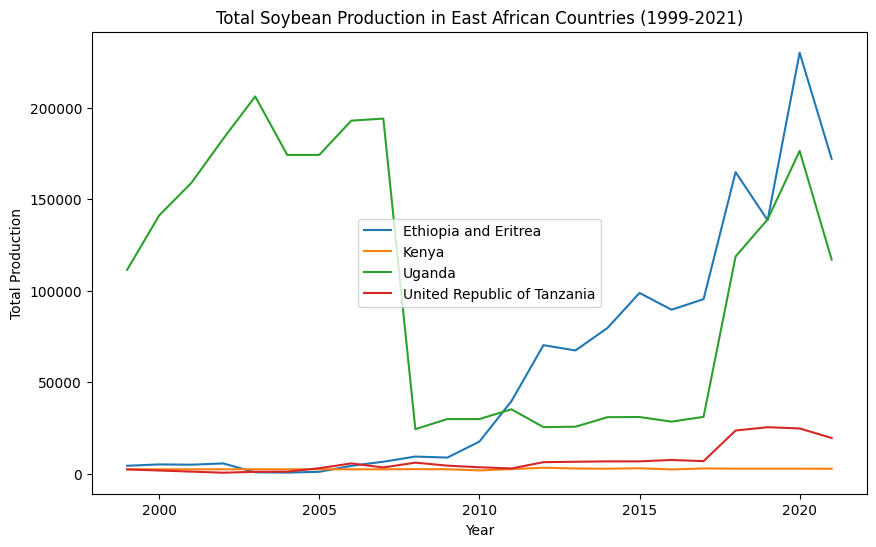

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: SARIMAX models require univariate `endog`. Got shape (4, 18).

In [ ]:
#plot the time series for each country
plt.figure(figsize=(10, 6))
for index, row in crops.iterrows():
    plt.plot(range(1999, 2022), row['Y1999':'Y2021'], label=row['Area'])
plt.title('Total Soybean Production in East African Countries (1999-2021)')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend()
plt.show()

#split the data into training and testing sets
train_data = crops.iloc[:, :-5]  # Use data up to 2016 for training
test_data = crops.iloc[:, -5:]   # Test on data from 2017 to 2021

#drop non-numeric columns
train_data_numeric = train_data.drop(['Area', 'Unit'], axis=1)

#build the SARIMA model
sarima_model = SARIMAX(train_data_numeric, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()


#forecast future production
forecast = sarima_result.forecast(steps=len(test_data))  #forecast for the same length as the test data

#evaluate the model and calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_data, forecast, squared=False)
print('RMSE:', rmse)

#plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Soybean Production Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 71116.89198882662


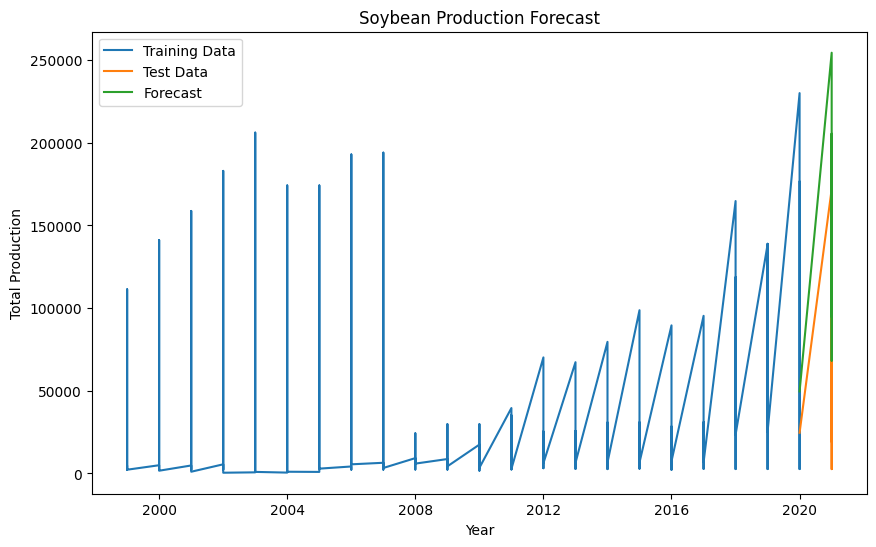

In [ ]:
#load necessary libraries
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_data = melted_df.iloc[:-5]  # Use data up to the fifth last year for training
test_data = melted_df.iloc[-5:]   # Test on data from the last five years

# Build the SARIMA model
sarima_model = SARIMAX(train_data['Production'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast future production
forecast = sarima_result.forecast(steps=len(test_data))

# Evaluate the model and calculate RMSE
rmse = mean_squared_error(test_data['Production'], forecast, squared=False)
print('RMSE:', rmse)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Production'], label='Training Data')
plt.plot(test_data.index, test_data['Production'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Soybean Production Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few obs

RMSE for Ethiopia and Eritrea: 77260.532650018


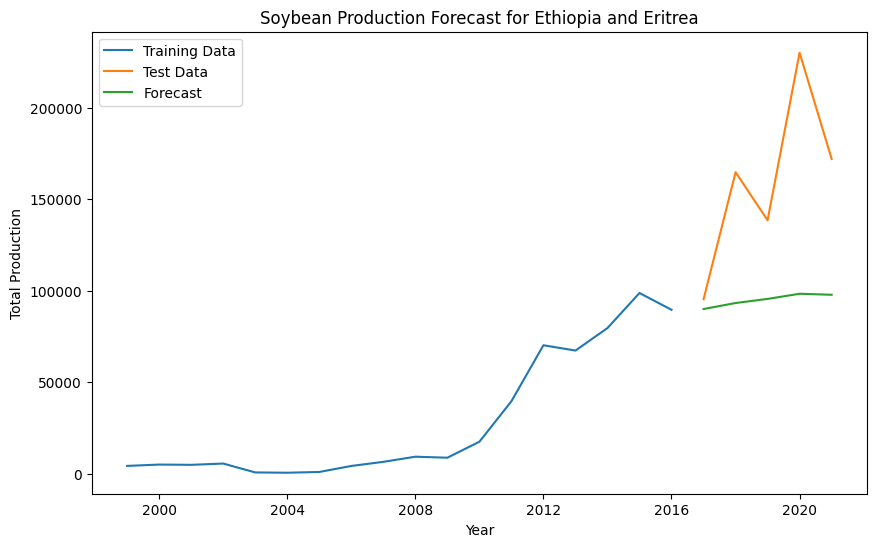

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE for Kenya: 787.7657409848798


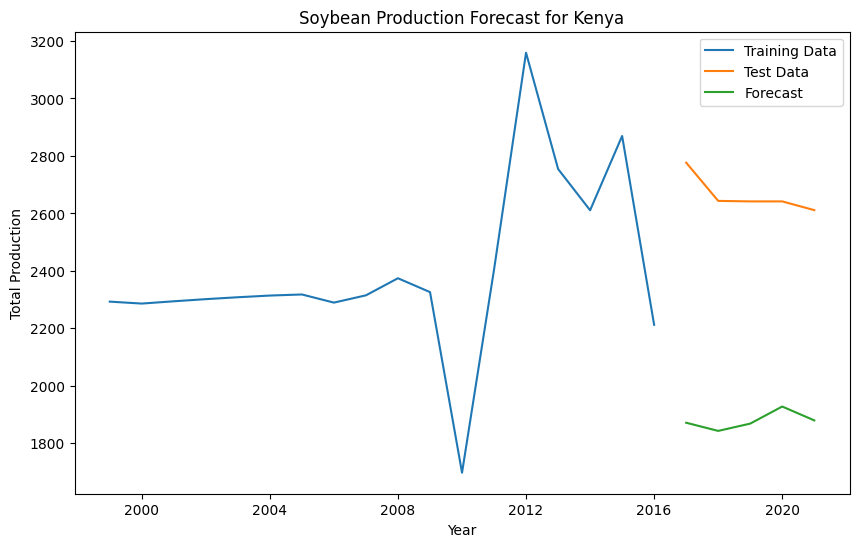

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few obs

RMSE for Uganda: 176843.4460991404


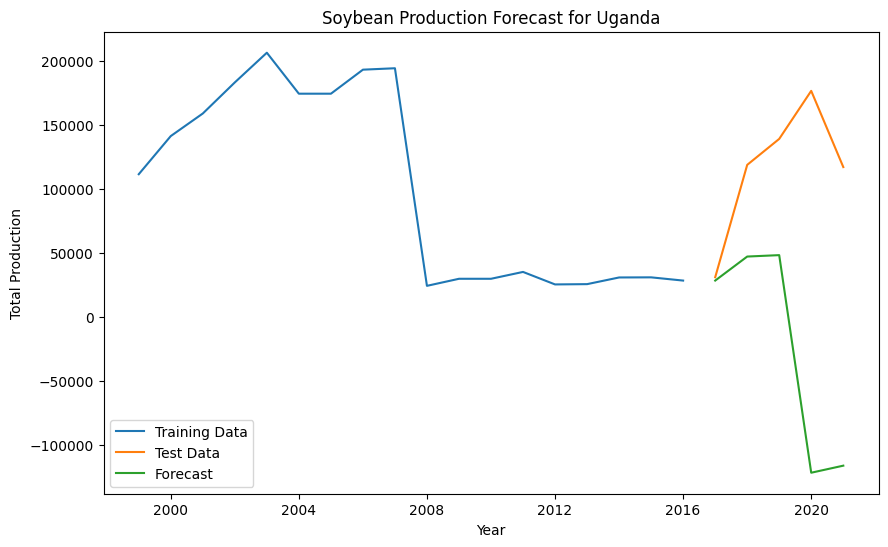

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE for United Republic of Tanzania: 11216.182335719095


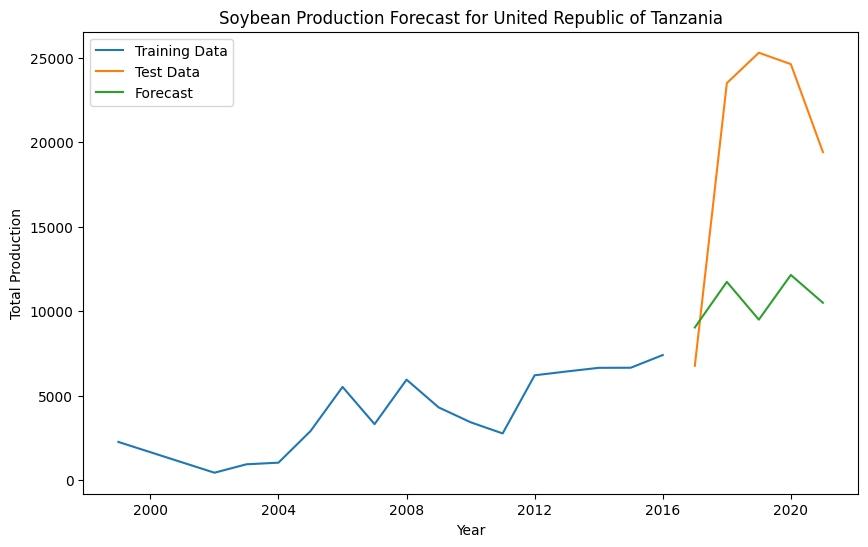

In [ ]:
#get unique countries
countries = melted_df['Area'].unique()

#loop through each country
for country in countries:
    #subset data for the current country
    country_data = melted_df[melted_df['Area'] == country]

    #split the data into training and testing sets
    train_data = country_data.iloc[:-5]  # Use data up to the fifth last year for training
    test_data = country_data.iloc[-5:]   # Test on data from the last five years

    #build the SARIMA model
    sarima_model = SARIMAX(train_data['Production'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_result = sarima_model.fit()

    #forecast future production
    forecast = sarima_result.forecast(steps=len(test_data))

    #evaluate the model and calculate RMSE
    rmse = mean_squared_error(test_data['Production'], forecast, squared=False)
    print(f'RMSE for {country}:', rmse)

    #plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Production'], label='Training Data')
    plt.plot(test_data.index, test_data['Production'], label='Test Data')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.xlabel('Year')
    plt.ylabel('Total Production')
    plt.title(f'Soybean Production Forecast for {country}')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE for Ethiopia and Eritrea: 75842.44490766403


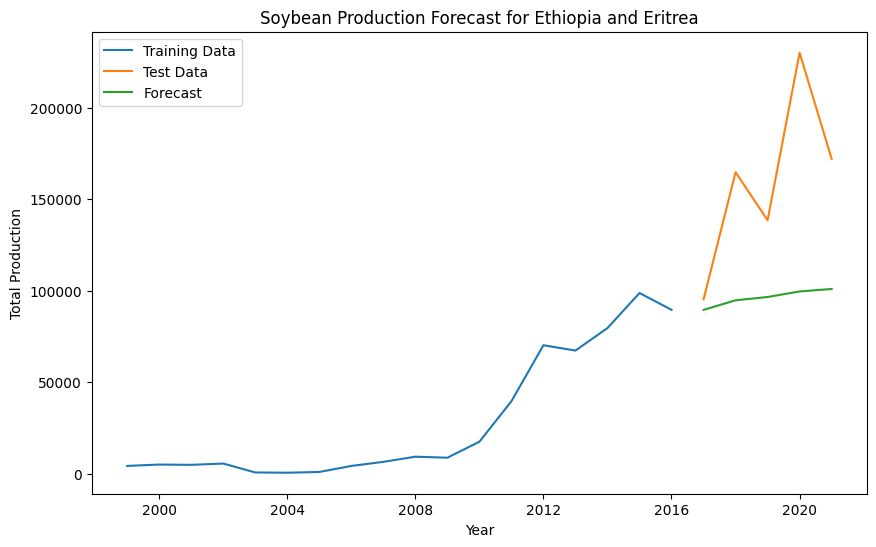

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/us

RMSE for Kenya: 250.51006525571904


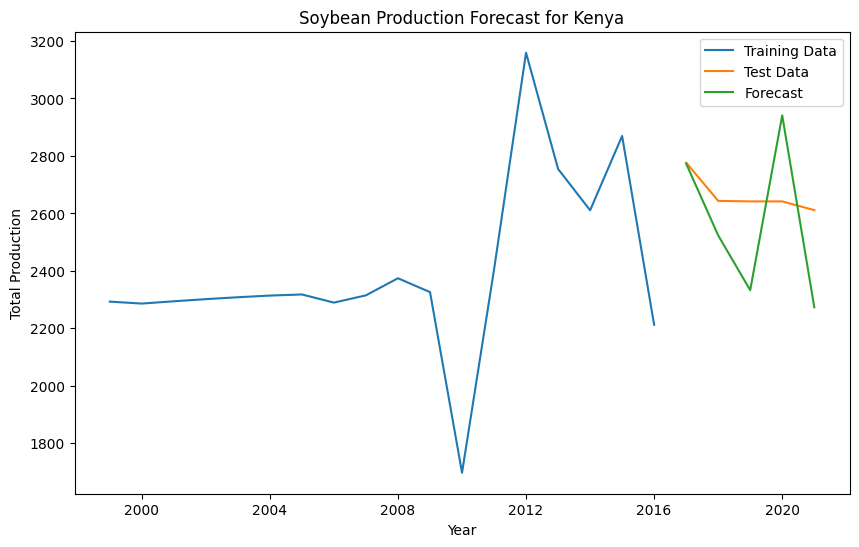

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE for Uganda: 108776.77885497188


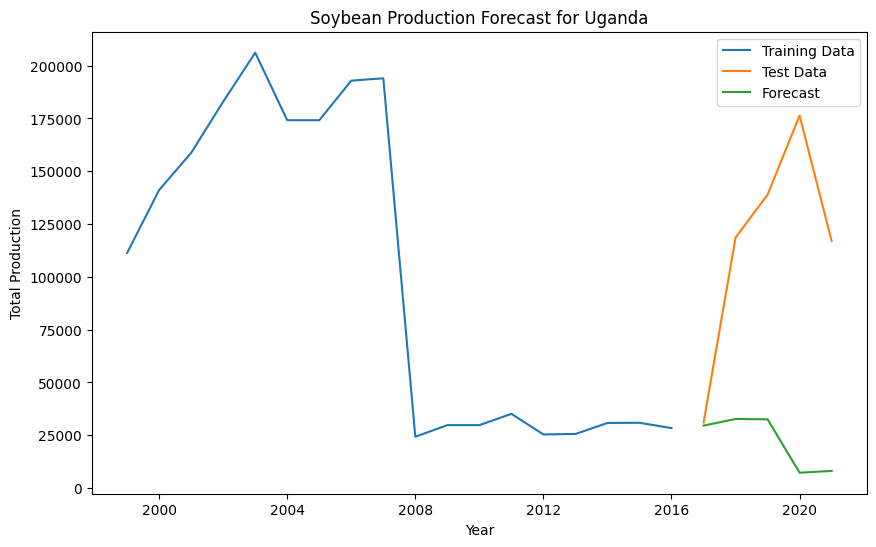

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/us

RMSE for United Republic of Tanzania: 12539.830714109601


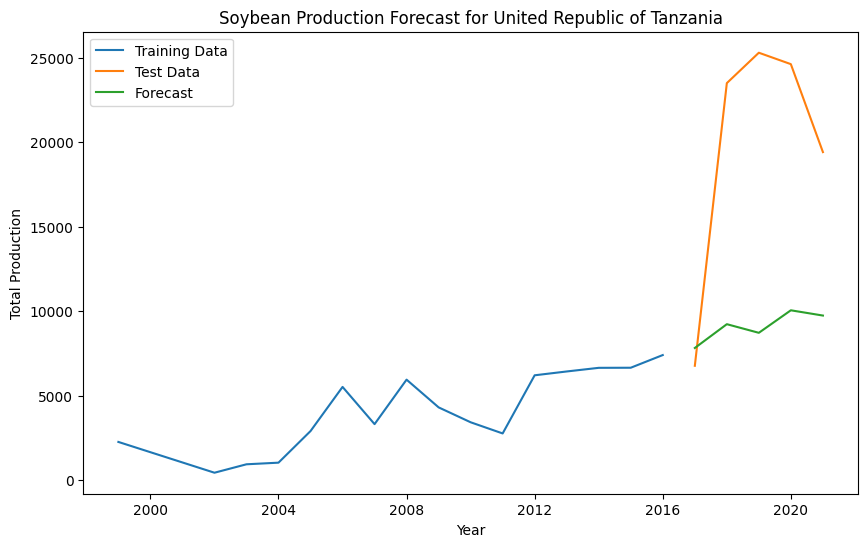

In [ ]:
#Parameter Tuning

#get unique countries
countries = melted_df['Area'].unique()

#loop through each country
for country in countries:
    #subset data for the current country
    country_data = melted_df[melted_df['Area'] == country]

    #split the data into training and testing sets
    train_data = country_data.iloc[:-5]  # Use data up to the fifth last year for training
    test_data = country_data.iloc[-5:]   # Test on data from the last five years

    #build the SARIMA model
    sarima_model = SARIMAX(train_data['Production'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
    sarima_result = sarima_model.fit()

    #forecast future production
    forecast = sarima_result.forecast(steps=len(test_data))

    #evaluate the model and calculate RMSE
    rmse = mean_squared_error(test_data['Production'], forecast, squared=False)
    print(f'RMSE for {country}:', rmse)

    #Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Production'], label='Training Data')
    plt.plot(test_data.index, test_data['Production'], label='Test Data')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.xlabel('Year')
    plt.ylabel('Total Production')
    plt.title(f'Soybean Production Forecast for {country}')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All 

Best SARIMA parameters for Ethiopia and Eritrea: ((0, 0, 0), (0, 1, 1, 12))
RMSE for Ethiopia and Eritrea: 159690.07382214663


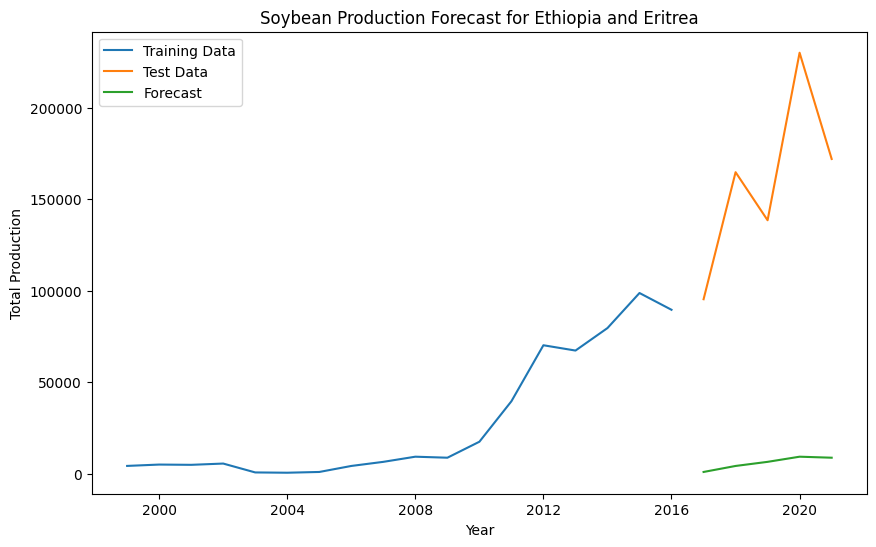

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All 

Best SARIMA parameters for Kenya: ((0, 0, 0), (0, 1, 1, 12))
RMSE for Kenya: 345.0889864459709


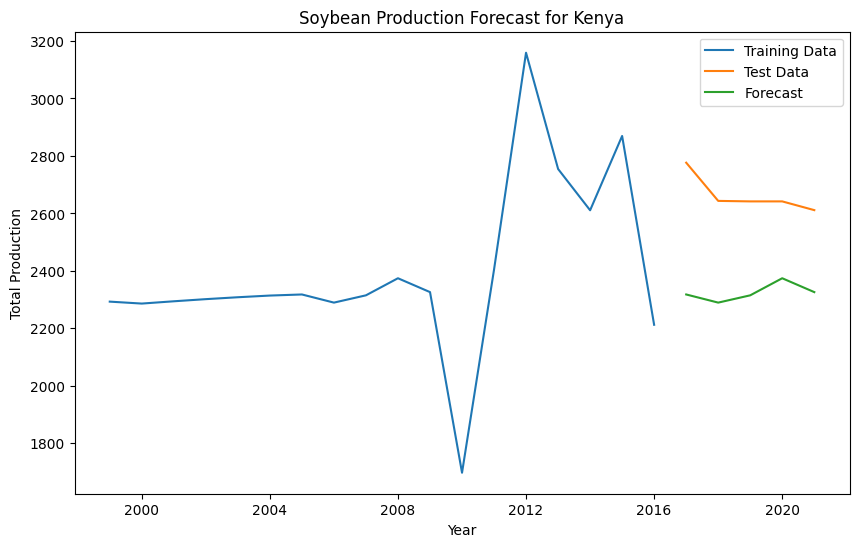

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All 

Best SARIMA parameters for Uganda: ((0, 0, 0), (0, 1, 1, 12))
RMSE for Uganda: 109354.20645046076


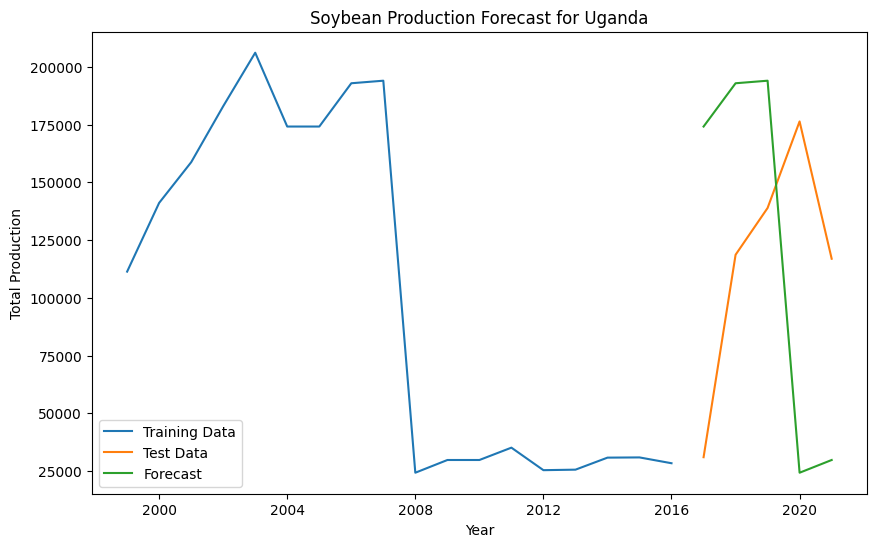

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All 

Best SARIMA parameters for United Republic of Tanzania: ((0, 0, 0), (0, 1, 1, 12))
RMSE for United Republic of Tanzania: 16733.47663606252


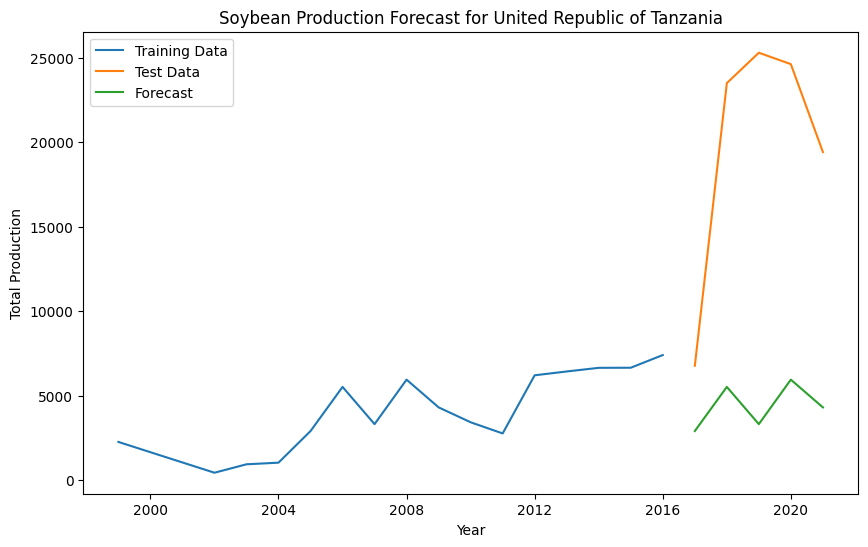

In [ ]:
import itertools

#attempting to automatically find the best parameters....trying to get the RMSE to be lower
#how can we get a more accurate or better forecast??

#define the parameter grid
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#get unique countries
countries = melted_df['Area'].unique()

#loop through each country
for country in countries:
    #subset data for the current country
    country_data = melted_df[melted_df['Area'] == country]

    #split the data into training and testing sets
    train_data = country_data.iloc[:-5]  # Use data up to the fifth last year for training
    test_data = country_data.iloc[-5:]   # Test on data from the last five years

    #initialize variables to store best parameters and corresponding AIC
    best_aic = float("inf")
    best_params = None

    #perform grid search
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = SARIMAX(train_data['Production'],
                              order=param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=False,
                              enforce_invertibility=False)

                results = mod.fit()

                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = (param, param_seasonal)
            except:
                continue

    #print best parameters for current country
    print(f"Best SARIMA parameters for {country}: {best_params}")

    #build the SARIMA model using best parameters
    sarima_model = SARIMAX(train_data['Production'],
                           order=best_params[0],
                           seasonal_order=best_params[1],
                           enforce_stationarity=False,
                           enforce_invertibility=False)

    #fit the model
    sarima_result = sarima_model.fit()

    #forecast future production
    forecast = sarima_result.forecast(steps=len(test_data))

    #evaluate the model and calculate RMSE
    rmse = mean_squared_error(test_data['Production'], forecast, squared=False)
    print(f'RMSE for {country}:', rmse)

    #plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Production'], label='Training Data')
    plt.plot(test_data.index, test_data['Production'], label='Test Data')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.xlabel('Year')
    plt.ylabel('Total Production')
    plt.title(f'Soybean Production Forecast for {country}')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#split the data into features (X) and target (y)
X = melted_df.drop(columns=['Area', 'Unit'])
y = melted_df['Area']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

#make predictions on the test set
y_pred = rf_classifier.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5789473684210527
Classification Report:
                             precision    recall  f1-score   support

       Ethiopia and Eritrea       0.50      0.43      0.46         7
                      Kenya       1.00      1.00      1.00         2
                     Uganda       0.67      0.40      0.50         5
United Republic of Tanzania       0.50      0.80      0.62         5

                   accuracy                           0.58        19
                  macro avg       0.67      0.66      0.64        19
               weighted avg       0.60      0.58      0.57        19



In [ ]:
from statsmodels.tools.eval_measures import meanabs
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import aic, bic



#calculate Mean Absolute Error (MAE)
mae = meanabs(test_data['Production'], forecast)
print("Mean Absolute Error (MAE):", mae)

#calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_data['Production'], forecast)
print("Mean Absolute Percentage Error (MAPE):", mape)

#calculate Akaike Information Criterion (AIC)
aic_value = aic(sarima_result.llf, sarima_result.nobs, sarima_result.params)
print("Akaike Information Criterion (AIC):", aic_value)

#calculate Bayesian Information Criterion (BIC)
bic_value = bic(sarima_result.llf, sarima_result.nobs, sarima_result.params)
print("Bayesian Information Criterion (BIC):", bic_value)


Mean Absolute Error (MAE): 15530.416400831198
Mean Absolute Percentage Error (MAPE): 0.7486848343571104
Akaike Information Criterion (AIC): ma.S.L12    0.000000e+00
sigma2      6.908868e+06
dtype: float64
Bayesian Information Criterion (BIC): ma.S.L12    0.000000e+00
sigma2      9.984598e+06
dtype: float64


In [ ]:

#calculate RMSE for training data
train_rmse = np.sqrt(mean_squared_error(train_data['Production'], sarima_result.fittedvalues))

#calculate RMSE for testing data
test_rmse = np.sqrt(mean_squared_error(test_data['Production'], forecast))

print('RMSE for training data:', train_rmse)
print('RMSE for testing data:', test_rmse)


RMSE for training data: 4000.4151949945453
RMSE for testing data: 16733.47663606252


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE for Ethiopia and Eritrea: 75842.44490766403


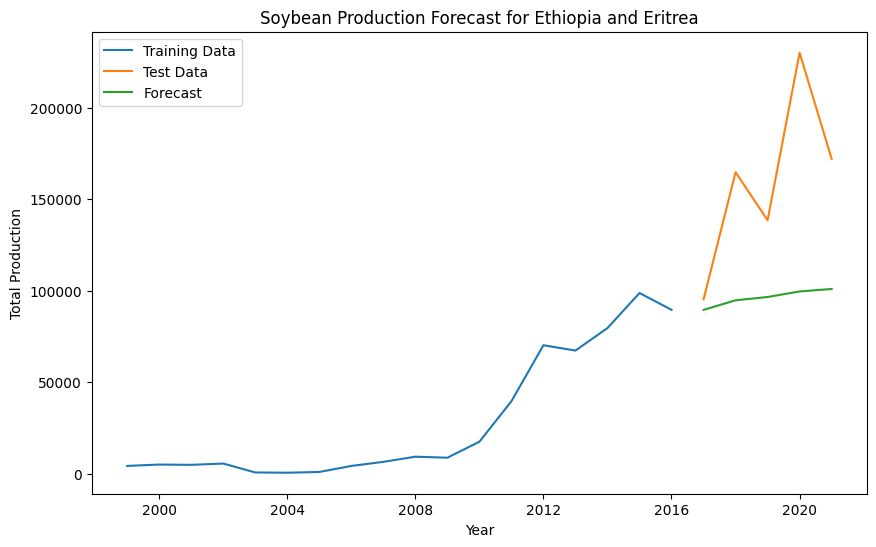

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/us

RMSE for Kenya: 250.51006525571904


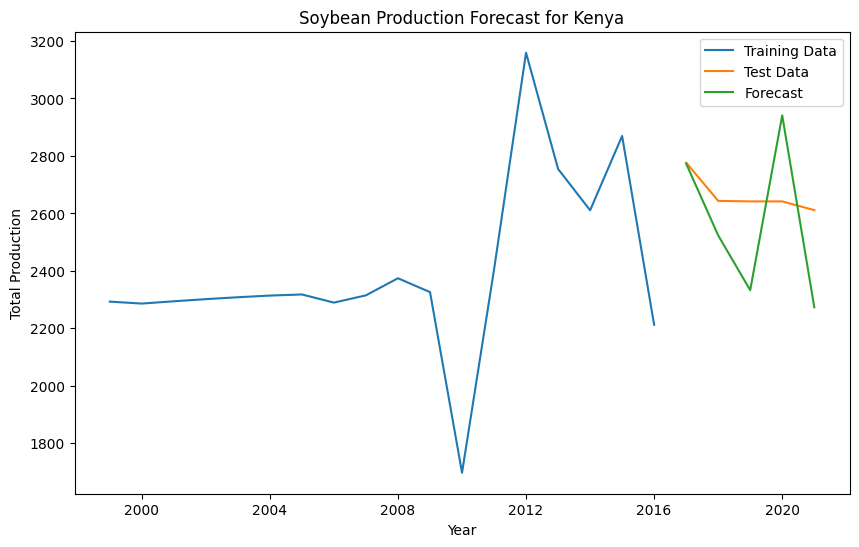

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RMSE for Uganda: 108776.77885497188


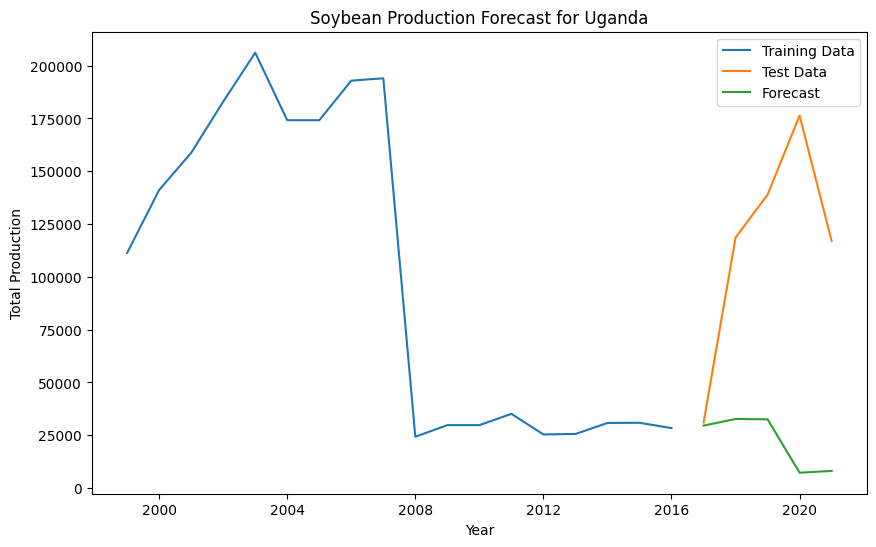

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/us

RMSE for United Republic of Tanzania: 12539.830714109601


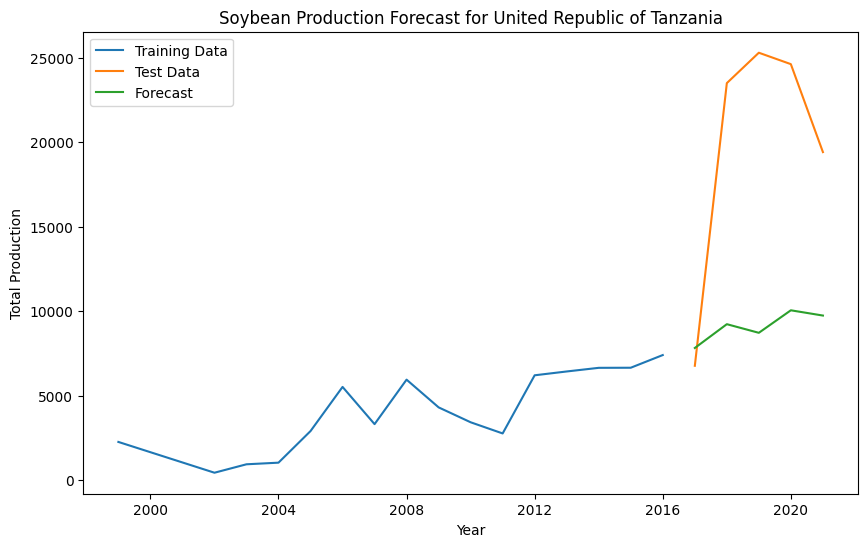

In [ ]:
#Parameter Tuning

#get unique countries
countries = melted_df['Area'].unique()

#loop through each country
for country in countries:
    #subset data for the current country
    country_data = melted_df[melted_df['Area'] == country]

    #split the data into training and testing sets
    train_data = country_data.iloc[:-5]  # Use data up to the fifth last year for training
    test_data = country_data.iloc[-5:]   # Test on data from the last five years

    #build the SARIMA model
    sarima_model = SARIMAX(train_data['Production'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
    sarima_result = sarima_model.fit()

    #forecast future production
    forecast = sarima_result.forecast(steps=len(test_data))

    #evaluate the model and calculate RMSE
    rmse = mean_squared_error(test_data['Production'], forecast, squared=False)
    print(f'RMSE for {country}:', rmse)

    #Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Production'], label='Training Data')
    plt.plot(test_data.index, test_data['Production'], label='Test Data')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.xlabel('Year')
    plt.ylabel('Total Production')
    plt.title(f'Soybean Production Forecast for {country}')
    plt.legend()
    plt.show()